In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv(r"C:\Users\saksh\Downloads\extended_data.csv")
df

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [5]:
df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon    17
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [7]:
df.shape

(28143, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_year        28143 non-null  int64  
 1   brand             28143 non-null  object 
 2   model             28143 non-null  object 
 3   type              28143 non-null  object 
 4   miles_per_gallon  28126 non-null  float64
 5   premium_version   28143 non-null  int64  
 6   msrp              28126 non-null  float64
 7   collection_car    28143 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ MB


In [11]:
df[df.duplicated()]

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car


In [13]:
df.nunique()

model_year            36
brand                 57
model               1898
type                   9
miles_per_gallon     121
premium_version        2
msrp                2950
collection_car         2
dtype: int64

In [15]:
df.drop(['model'],axis=1,inplace= True)

In [17]:
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,SUV,13.0,1,84900.0,0
1,2014,RAM,Van,15.0,0,35000.0,0
2,2002,Ford,Coupe,16.0,0,26250.0,0
3,2012,BMW,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,Coupe,18.0,0,25000.0,0
28140,2018,Ford,SUV,94.0,1,199000.0,1
28141,2022,Land,SUV,20.0,1,63700.0,0


In [19]:
df.drop(['collection_car'],axis=1,inplace= True)

In [21]:
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<10:
        print(i,df[i].nunique(),df[i].unique())
        cat.append(i)
    else:
        num.append(i)

type 9 ['SUV' 'Van' 'Coupe' 'Sedan' 'Convertible' 'Pickup' 'Minivan' 'Hatchback'
 'Wagon']
premium_version 2 [1 0]


In [23]:
cat

['type', 'premium_version']

In [25]:
num

['model_year', 'brand', 'miles_per_gallon', 'msrp']

In [27]:
df['miles_per_gallon'].fillna(df['miles_per_gallon'].mean(),inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_28352\1110920637.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['miles_per_gallon'].fillna(df['miles_per_gallon'].mean(),inplace=True)


In [29]:
df['msrp'].fillna(df['msrp'].mean(),inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_28352\3032958250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['msrp'].fillna(df['msrp'].mean(),inplace=True)


In [31]:
df.isnull().sum()

model_year          0
brand               0
type                0
miles_per_gallon    0
premium_version     0
msrp                0
dtype: int64

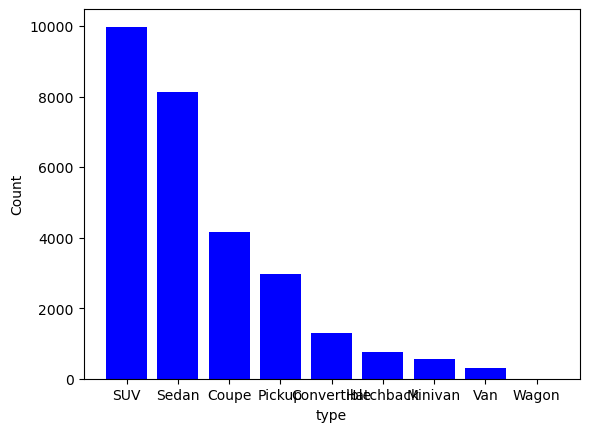

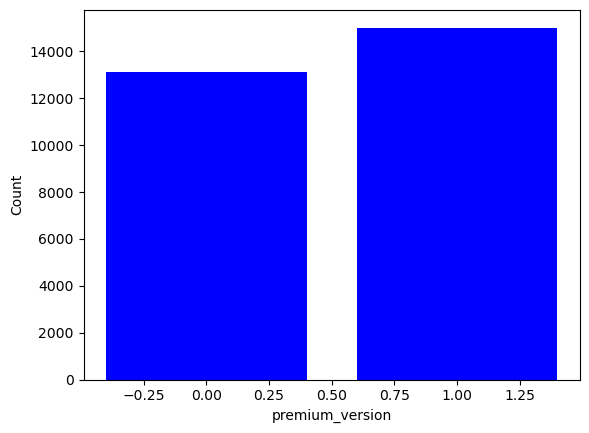

In [33]:
for i in cat:
    vc= df[i].value_counts()
    plt.bar(vc.index,height= vc, color= 'b')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

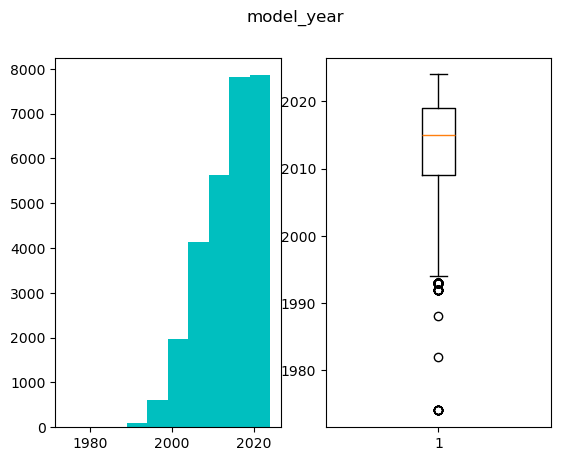

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

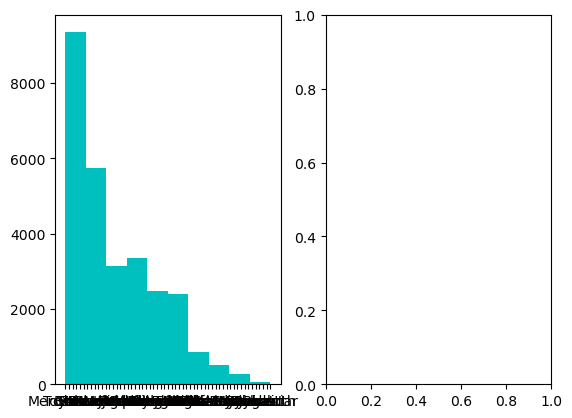

In [38]:
for i in num:
    fig, ax = plt.subplots(1,2)
    ax[0].hist(df[i],color = 'c')
    ax[1].boxplot(df[i])
    plt.suptitle(i)
    plt.show()

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe= OneHotEncoder(sparse_output= False)
types = ohe.fit_transform(df[['type']])
types

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [44]:
df['type']

0                SUV
1                Van
2              Coupe
3              Sedan
4        Convertible
            ...     
28138          Coupe
28139          Coupe
28140            SUV
28141            SUV
28142          Sedan
Name: type, Length: 28143, dtype: object

In [46]:
ohe.categories_

[array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'SUV',
        'Sedan', 'Van', 'Wagon'], dtype=object)]

In [48]:
types_df= pd.DataFrame(types,columns= ohe.categories_)
types_df

,Convertible,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
28138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
types_df.drop(['Wagon'],axis=1,inplace= True)

In [52]:
df= pd.concat([df,types_df], axis=1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2002,Ford,Coupe,16.0,0,26250.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
ohe= OneHotEncoder(sparse_output= False)
brand = ohe.fit_transform(df[['brand']])
brand

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
df['brand']

0               Toyota
1                  RAM
2                 Ford
3                  BMW
4        Mercedes-Benz
             ...      
28138          Bentley
28139            Mazda
28140             Ford
28141             Land
28142             Audi
Name: brand, Length: 28143, dtype: object

In [58]:
ohe.categories_

[array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
        'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object)]

In [60]:
brand_df= pd.DataFrame(brand,columns= ohe.categories_)
brand_df

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
brand_df.drop('Acura',inplace= True, axis=1)

In [64]:
df= pd.concat([df,brand_df], axis=1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df.drop(['brand', 'type'], inplace=True, axis=1)

In [68]:
df

,model_year,miles_per_gallon,premium_version,msrp,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,13.0,1,84900.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,15.0,0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,16.0,0,26250.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,27.0,1,45000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,18.0,1,100000.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,21.0,1,200000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,18.0,0,25000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,94.0,1,199000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,20.0,1,63700.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
x_df = df.drop(['msrp','model_year'], axis = 1)
y = df['msrp']

In [72]:
x= x_df.values
y= y.values

In [74]:
x

array([[13.,  1.,  0., ...,  0.,  0.,  0.],
       [15.,  0.,  0., ...,  0.,  0.,  0.],
       [16.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [94.,  1.,  0., ...,  0.,  0.,  0.],
       [20.,  1.,  0., ...,  0.,  0.,  0.],
       [22.,  1.,  0., ...,  0.,  0.,  0.]])

In [76]:
y

array([ 84900.,  35000.,  26250., ..., 199000.,  63700.,  83500.])

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2,random_state=0)

In [80]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22514, 66)
(5629, 66)
(22514,)
(5629,)


In [84]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)

y_train_pred = lr_model.predict(x_train)

LinearRegression()

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_t= mean_squared_error(y_train_pred,y_train)
rmse_t= mean_squared_error(y_train_pred,y_train)** 0.5
mae_t= mean_absolute_error(y_train_pred,y_train)
r2_lin_train= r2_score(y_train,y_train_pred)

print('Training MSE: ',mse_t)
print('Training RMSE: ',rmse_t)
print('Training MAE: ',mae_t)
print('Training R2 Score: ',r2_lin_train)

print('-------------------------------------------------------------')

y_test_pred = lr_model.predict(x_test)
mse_test= mean_squared_error(y_test_pred,y_test)
rmse_test= mean_squared_error(y_test_pred,y_test)**0.5
mae_test= mean_absolute_error(y_test_pred,y_test)
r2_lin_test= r2_score(y_test,y_test_pred)

print('Testing MSE:',mse_test)
print('Testing RMSE:',rmse_test)
print('Testing MAE:',mae_test)
print('Testing R2 Score: ',r2_lin_test)

Training MSE:  1115682770.0973992
Training RMSE:  33401.83782514668
Training MAE:  17345.448901847554
Training R2 Score:  0.7080964242011707
-------------------------------------------------------------
Testing MSE: 1978359735.3749793
Testing RMSE: 44478.75600075815
Testing MAE: 17812.09970694084
Testing R2 Score:  0.4485639290404221


In [98]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson as dw
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import probplot, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

def test_linear_regression_assumptions(x, y, x_df):
    """ 
    Tests key assumptions of linear regression: Linearity, Independence, Homoscedasticity,
    Normality, and No Multicollinearity.

    Parameters:
    x (DataFrame): Independent variables
    y (Series): Dependent variable
    x_df (DataFrame): Original independent variable dataframe (before adding constant)

    Returns: 
    None
    """

    # Add constant for intercept
    x = sm.add_constant(x)

    # Fit OLS model
    ols_model = sm.OLS(y, x).fit()
    residuals = ols_model.resid
    predicted_values = ols_model.fittedvalues

    # 1. Linearity
    print("1. Linearity:\n")
    plt.scatter(predicted_values, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(y=0, color='red', linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.show()
    print("Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.\n")

    # 2. No Autocorrelations: Independence of Errors (Durbin-Watson Test)
    print("2. Independence of Errors (Durbin-Watson test):\n")
    dw_stat = dw(residuals)
    print(f"Durbin-Watson statistic: {dw_stat}")
    if 1.5 <= dw_stat <= 2.5:
        print("Residuals appear to be independent (No autocorrelation).\n")
    else:
        print("Residuals show autocorrelation. Consider adding lag variables or using GLS.\n")

    # 3. Homoscedasticity (Breusch-Pagan Test)
    print("3. Homoscedasticity (Breusch-Pagan Test):\n")
    bp_test = het_breuschpagan(residuals, x)
    print(f"Lagrange Multiplier Statistic: {bp_test[0]}")
    print(f"p-value: {bp_test[1]}")
    if bp_test[1] > 0.05:
        print("Residuals have constant variance (Homoscedasticity).\n")
    else:
        print("Residuals do not have constant variance (Heteroscedasticity). Consider GLS or transformations.\n")

    # 4. Normality of Errors
    print("4. Normality of Errors:\n")
    sns.histplot(residuals, kde=True, bins=20, color='blue')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    if shapiro_test.pvalue > 0.05:
        print("Residuals are normally distributed.\n")
    else:
        print("Residuals are not normally distributed. Consider transformations or robust regression.\n")

    # 5. Multicollinearity (Variance Inflation Factor)
    print("5. Multicollinearity (Variance Inflation Factor):\n")
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x_df.columns
    vif_data["VIF"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
    print(vif_data)
    if vif_data["VIF"].max() > 10:
        print("High multicollinearity detected. Consider removing or combining highly correlated variables.\n")
    else:
        print("No significant multicollinearity detected.\n")

1. Linearity:



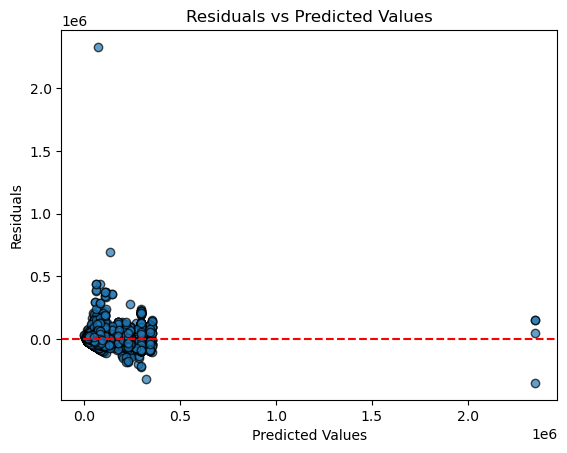

Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.

2. Independence of Errors (Durbin-Watson test):

Durbin-Watson statistic: 1.9947714343759404
Residuals appear to be independent (No autocorrelation).

3. Homoscedasticity (Breusch-Pagan Test):

Lagrange Multiplier Statistic: 118.61833968331257
p-value: 7.635815723777986e-05
Residuals do not have constant variance (Heteroscedasticity). Consider GLS or transformations.

4. Normality of Errors:



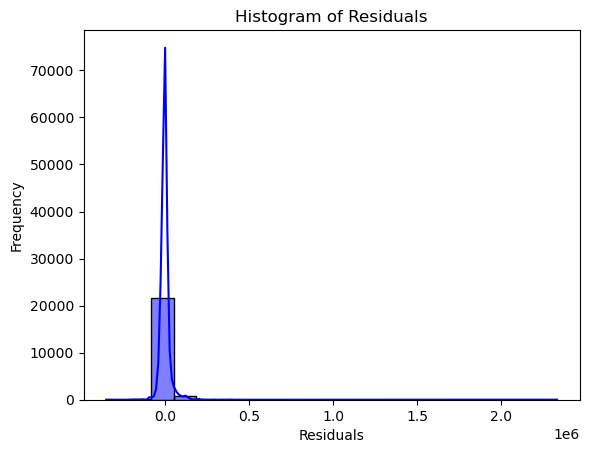

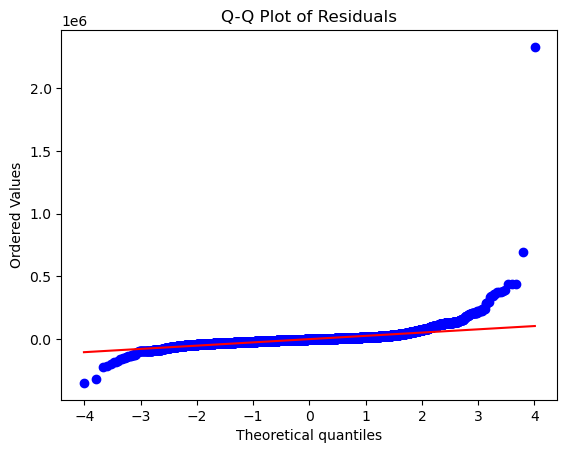

C:\Users\saksh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22514.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-value: 7.680030214188251e-113
Residuals are not normally distributed. Consider transformations or robust regression.

5. Multicollinearity (Variance Inflation Factor):

             Feature       VIF
0   miles_per_gallon  5.905347
1    premium_version  2.634762
2     (Convertible,)  3.436802
3           (Coupe,)  8.390625
4       (Hatchback,)  2.796721
..               ...       ...
61          (Tesla,)  1.883368
62         (Toyota,)  3.665133
63     (Volkswagen,)  2.092288
64          (Volvo,)  1.514709
65          (smart,)  1.005072

[66 rows x 2 columns]
High multicollinearity detected. Consider removing or combining highly correlated variables.



In [100]:
test_linear_regression_assumptions(x_train,y_train,x_df)

Polynomial Regression

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [109]:
poly=PolynomialFeatures(degree=2)
X_poly_train=poly.fit_transform(x_train)
X_poly_test=poly.transform(x_test)

In [110]:
x_train[0]

array([25.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])

In [112]:
X_poly_train[0]

array([ 1., 25.,  0., ...,  0.,  0.,  0.])

In [115]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_train)
y_poly_pred

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_poly_train = mean_squared_error(y_poly_pred, y_train)
rmse_poly_train = mean_squared_error(y_poly_pred , y_train) ** 0.5
mae_poly_train = mean_absolute_error(y_poly_pred, y_train)
r2_poly_train = r2_score(y_poly_pred, y_train)

print("Training MSE is:", mse_poly_train)
print("Training RMSE is:", rmse_poly_train)
print("Training MAE is:", mae_poly_train)
print("Training R2 Score is:", r2_poly_train)

print('--------------------------------------------------------------------')

y_poly_test_pred = poly_model.predict(X_poly_test)

mse_poly_test = mean_squared_error(y_test, y_poly_test_pred)
rmse_poly_test = mse_poly_test ** 0.5  # RMSE is the square root of MSE
mae_poly_test = mean_absolute_error(y_test, y_poly_test_pred)
r2_poly_test = r2_score(y_test, y_poly_test_pred)  # Corrected order

# Printing the results
print("Testing MSE:", mse_poly_test)
print("Testing RMSE :", rmse_poly_test)
print("Testing MAE:", mae_poly_test)
print("Testing R² Score:", r2_poly_test)

Training MSE is: 918423944.5199969
Training RMSE is: 30305.510134627282
Training MAE is: 15066.727023887779
Training R2 Score is: 0.6836984060091904
--------------------------------------------------------------------
Testing MSE: 1.22703193581445e+20
Testing RMSE : 11077147357.575642
Testing MAE: 201328130.1458129
Testing R² Score: -34201548763.294716


In [119]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

l1 = Lasso(alpha=1.0)
l1.fit(x_train, y_train)

y_pred_train_l1 = l1.predict(x_train)

mse_l1_train = mean_squared_error(y_train, y_pred_train_l1)
rmse_l1_train = mean_squared_error(y_train, y_pred_train_l1, squared=False)  # Correct RMSE calculation
mae_l1_train = mean_absolute_error(y_train, y_pred_train_l1)
r2_l1_train = r2_score(y_train, y_pred_train_l1)

print("Training MSE:", mse_l1_train)
print("Training RMSE:", rmse_l1_train)
print("Training MAE:", mae_l1_train)
print("Training R²:", r2_l1_train)

print('------------------------------------------------------------------------------')

y_pred_test_l1 = l1.predict(x_test)

mse_l1_test = mean_squared_error(y_test, y_pred_test_l1)
rmse_l1_test = mean_squared_error(y_test, y_pred_test_l1, squared=False)  # Correct RMSE calculation
mae_l1_test = mean_absolute_error(y_test, y_pred_test_l1)
r2_l1_test = r2_score(y_test, y_pred_test_l1)

print("Testing MSE:", mse_l1_test)
print("Testing RMSE:", rmse_l1_test)
print("Testing MAE:", mae_l1_test)
print("Testing R²:", r2_l1_test)

Training MSE: 1115738395.4496317
Training RMSE: 33402.67048380461
Training MAE: 17346.07535581778
Training R²: 0.7080818705666997
------------------------------------------------------------------------------
Testing MSE: 1978273412.394103
Testing RMSE: 44477.785605784185
Testing MAE: 17805.020544555267
Testing R²: 0.4485879901879255


C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [123]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

l2 = Ridge(alpha=1.0)
l2.fit(x_train, y_train)

y_pred_train_l2 = l2.predict(x_train)

mse_l2_train = mean_squared_error(y_train, y_pred_train_l2)
rmse_l2_train = mean_squared_error(y_train, y_pred_train_l2, squared=False)  # Correct RMSE calculation
mae_l2_train = mean_absolute_error(y_train, y_pred_train_l2)
r2_l2_train = r2_score(y_train, y_pred_train_l2)

print("Training MSE:", mse_l2_train)
print("Training RMSE:", rmse_l2_train)
print("Training MAE:", mae_l2_train)
print("Training R²:", r2_l2_train)

print('----------------------------------------------------------------------------')

y_pred_test_l2 = l2.predict(x_test)

mse_l2_test = mean_squared_error(y_test, y_pred_test_l2)
rmse_l2_test = mean_squared_error(y_test, y_pred_test_l2, squared=False)  # Correct RMSE calculation
mae_l2_test = mean_absolute_error(y_test, y_pred_test_l2)
r2_l2_test = r2_score(y_test, y_pred_test_l2)

print("Testing MSE:", mse_l2_test)
print("Testing RMSE:", rmse_l2_test)
print("Testing MAE:", mae_l2_test)
print("Testing R²:", r2_l2_test)

Training MSE: 1154087931.3551443
Training RMSE: 33971.86970649605
Training MAE: 17465.573280155284
Training R²: 0.6980482239414431
----------------------------------------------------------------------------
Testing MSE: 1981482019.0116591
Testing RMSE: 44513.840757809914
Testing MAE: 17879.075803646036
Testing R²: 0.44769364251454624


C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [125]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

l1_l2 = ElasticNet(alpha=1.0)
l1_l2.fit(x_train, y_train)

y_pred_train_l1_l2 = l1_l2.predict(x_train)

mse_l1_l2_train = mean_squared_error(y_train, y_pred_train_l1_l2)
rmse_l1_l2_train = mean_squared_error(y_train, y_pred_train_l1_l2, squared=False)  # Correct RMSE calculation
mae_l1_l2_train = mean_absolute_error(y_train, y_pred_train_l1_l2)
r2_l1_l2_train = r2_score(y_train, y_pred_train_l1_l2)

print("Training Performance:")
print("MSE:", mse_l1_l2_train)
print("RMSE:", rmse_l1_l2_train)
print("MAE:", mae_l1_l2_train)
print("R²:", r2_l1_l2_train)

print('----------------------------------------------------------------------')
y_pred_test_l1_l2 = l1_l2.predict(x_test)

mse_l1_l2_test = mean_squared_error(y_test, y_pred_test_l1_l2)
rmse_l1_l2_test = mean_squared_error(y_test, y_pred_test_l1_l2, squared=False)  # Correct RMSE calculation
mae_l1_l2_test = mean_absolute_error(y_test, y_pred_test_l1_l2)
r2_l1_l2_test = r2_score(y_test, y_pred_test_l1_l2)

print("\nTest Performance:")
print("MSE:", mse_l1_l2_test)
print("RMSE:", rmse_l1_l2_test)
print("MAE:", mae_l1_l2_test)
print("R²:", r2_l1_l2_test)

Training Performance:
MSE: 3420360051.844195
RMSE: 58483.84436615119
MAE: 28118.91402468439
R²: 0.10510822931716735
----------------------------------------------------------------------

Test Performance:
MSE: 3207782197.738501
RMSE: 56637.28628508344
MAE: 27586.47031878212
R²: 0.10588212043259992


C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [127]:
#knn regressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(x_train, y_train)

y_train_knn = knn_r.predict(x_train)

mse_knn_train = mean_squared_error(y_train, y_train_knn)
rmse_knn_train = mse_knn_train ** 0.5
mae_knn_train = mean_absolute_error(y_train, y_train_knn)
r2_knn_train = r2_score(y_train, y_train_knn)

print("Training Metrics:")
print("MSE:", mse_knn_train)
print("RMSE:", rmse_knn_train)
print("MAE:", mae_knn_train)
print("R² Score:", r2_knn_train)

print('--------------------------------------------------------------')

y_test_knn = knn_r.predict(x_test)

mse_knn_test = mean_squared_error(y_test, y_test_knn)
rmse_knn_test = mse_knn_test ** 0.5
mae_knn_test = mean_absolute_error(y_test, y_test_knn)
r2_knn_test = r2_score(y_test, y_test_knn)

print("\nTesting Metrics:")
print("MSE:", mse_knn_test)
print("RMSE:", rmse_knn_test)
print("MAE:", mae_knn_test)
print("R² Score:", r2_knn_test)

Training Metrics:
MSE: 551961314.3752182
RMSE: 23493.85694974791
MAE: 12215.990613718868
R² Score: 0.8555866544800346
--------------------------------------------------------------

Testing Metrics:
MSE: 1468731072.8136
RMSE: 38324.02735639353
MAE: 13869.10575761104
R² Score: 0.5906147513990592


In [115]:
# SVR

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

svr = SVR()
svr.fit(x_train, y_train)

y_train_svr = svr.predict(x_train)

mse_svr_train = mean_squared_error(y_train, y_train_svr)  # Corrected order
rmse_svr_train = mse_svr_train ** 0.5  # Taking square root for RMSE
mae_svr_train = mean_absolute_error(y_train, y_train_svr)
r2_svr_train = r2_score(y_train, y_train_svr)

print("Training Metrics:")
print("MSE:", mse_svr_train)
print("RMSE:", rmse_svr_train)
print("MAE:", mae_svr_train)
print("R² Score:", r2_svr_train)

y_test_svr = svr.predict(x_test)

mse_svr_test = mean_squared_error(y_test, y_test_svr)
rmse_svr_test = mse_svr_test ** 0.5
mae_svr_test = mean_absolute_error(y_test, y_test_svr)
r2_svr_test = r2_score(y_test, y_test_svr)

print("\nTesting Metrics:")
print("MSE:", mse_svr_test)
print("RMSE:", rmse_svr_test)
print("MAE:", mae_svr_test)
print("R² Score:", r2_svr_test)

Training Metrics:
MSE: 4064607063.224085
RMSE: 63754.27094104429
MAE: 28123.73199287139
R² Score: -0.06345044287876656

Testing Metrics:
MSE: 3803909642.630682
RMSE: 61675.84326647413
MAE: 27227.695004918845
R² Score: -0.060278851267629996


In [116]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dtree = DecisionTreeRegressor(max_depth= 10, random_state=0)
dtree.fit(x_train, y_train)

y_train_dtree = dtree.predict(x_train)

mse_dtree_train = mean_squared_error(y_train, y_train_dtree)  # Corrected order
rmse_dtree_train = mse_dtree_train ** 0.5  # Taking square root for RMSE
mae_dtree_train = mean_absolute_error(y_train, y_train_dtree)
r2_dtree_train = r2_score(y_train, y_train_dtree)

print("Training Metrics:")
print("MSE:", mse_dtree_train)
print("RMSE:", rmse_dtree_train)
print("MAE:", mae_dtree_train)
print("R² Score:", r2_dtree_train)

y_test_dtree = dtree.predict(x_test)

mse_dtree_test = mean_squared_error(y_test, y_test_dtree)
rmse_dtree_test = mse_dtree_test ** 0.5
mae_dtree_test = mean_absolute_error(y_test, y_test_dtree)
r2_dtree_test = r2_score(y_test, y_test_dtree)

print("\nTesting Metrics:")
print("MSE:", mse_dtree_test)
print("RMSE:", rmse_dtree_test)
print("MAE:", mae_dtree_test)
print("R² Score:", r2_dtree_test)

Training Metrics:
MSE: 1050102366.463545
RMSE: 32405.28300236776
MAE: 17373.513934571245
R² Score: 0.7252546656261786

Testing Metrics:
MSE: 1921020876.9167771
RMSE: 43829.45216309208
MAE: 18046.87010797827
R² Score: 0.4645462169206923


In [117]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

forest = RandomForestRegressor(max_depth= 20, n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

y_train_forest = forest.predict(x_train)

mse_forest_train = mean_squared_error(y_train, y_train_forest)  # Corrected order
rmse_forest_train = mse_forest_train ** 0.5  # Taking square root for RMSE
mae_forest_train = mean_absolute_error(y_train, y_train_forest)
r2_forest_train = r2_score(y_train, y_train_forest)

print("Training Metrics:")
print("MSE:", mse_forest_train)
print("RMSE:", rmse_forest_train)
print("MAE:", mae_forest_train)
print("R² Score:", r2_forest_train)

y_test_forest = forest.predict(x_test)

mse_forest_test = mean_squared_error(y_test, y_test_forest)
rmse_forest_test = mse_forest_test ** 0.5
mae_forest_test = mean_absolute_error(y_test, y_test_forest)
r2_forest_test = r2_score(y_test, y_test_forest)

print("\nTesting Metrics:")
print("MSE:", mse_forest_test)
print("RMSE:", rmse_forest_test)
print("MAE:", mae_forest_test)
print("R² Score:", r2_forest_test)

Training Metrics:
MSE: 532262451.88561577
RMSE: 23070.813853993444
MAE: 12521.399551974384
R² Score: 0.8607406001660313

Testing Metrics:
MSE: 1596980027.6813772
RMSE: 39962.23251623184
MAE: 13881.70851619157
R² Score: 0.5548674105528026


In [118]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

xgb_model.fit(x_train, y_train)

y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

mse_xgb_train = mean_squared_error(y_train, y_pred_train_xgb)
rmse_xgb_train = mse_xgb_train ** 0.5
mae_xgb_train = mean_absolute_error(y_train, y_pred_train_xgb)
r2_xgb_train = r2_score(y_train, y_pred_train_xgb)

mse_xgb_test = mean_squared_error(y_test, y_pred_test_xgb)
rmse_xgb_test = mse_xgb_test ** 0.5
mae_xgb_test = mean_absolute_error(y_test, y_pred_test_xgb)
r2_xgb_test = r2_score(y_test, y_pred_test_xgb)

print("Train Performance:")
print("MSE:", mse_xgb_train)
print("RMSE:", rmse_xgb_train)
print("MAE:", mae_xgb_train)
print("R²:", r2_xgb_train)

print("\nTest Performance:")
print("MSE:", mse_xgb_test)
print("RMSE:", rmse_xgb_test)
print("MAE:", mae_xgb_test)
print("R²:", r2_xgb_test)

Train Performance:
MSE: 560266121.3130416
RMSE: 23669.94130354027
MAE: 13341.409415612747
R²: 0.8534138120677977

Test Performance:
MSE: 1568032996.701515
RMSE: 39598.39639052969
MAE: 14206.597140996926
R²: 0.5629359315321052
